# Importing the libraries

In [1]:
#!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import time

# Original Images

Text(0.5, 1.0, 'Humans')

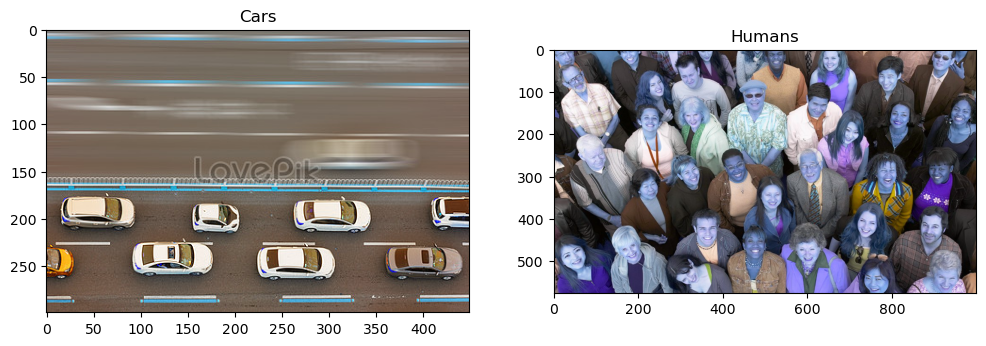

In [15]:
#Loading the images
cars_path = cv2.imread("cars.jpg")
humans_path = cv2.imread("humans.jpg")

#Showing the images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(cars_path)
axes[0].set_title("Cars")

axes[1].imshow(humans_path)
axes[1].set_title("Humans")


# Converting to RGB Format

Text(0.5, 1.0, 'Humans')

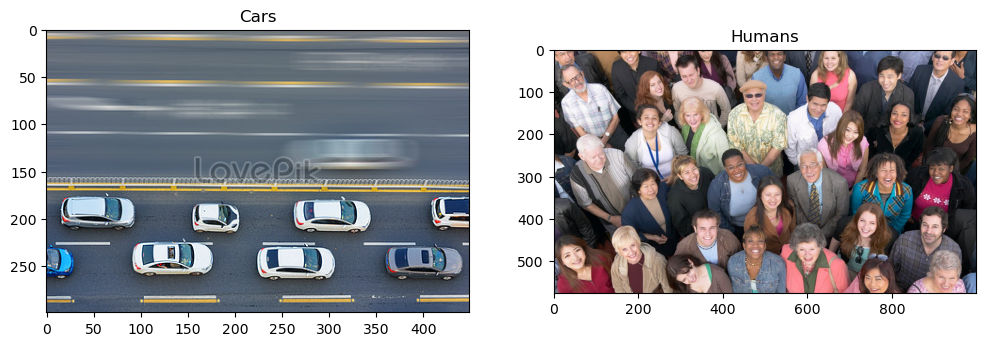

In [16]:
#Converting the original image to proper RGB Image
cars_image = cv2.cvtColor(cars_path, cv2.COLOR_BGR2RGB)
humans_image = cv2.cvtColor(humans_path, cv2.COLOR_BGR2RGB)

# Showing the RGB images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title("Cars")

axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title("Humans")


# Converting to Grayscale

Text(0.5, 1.0, 'Humans Grayscale')

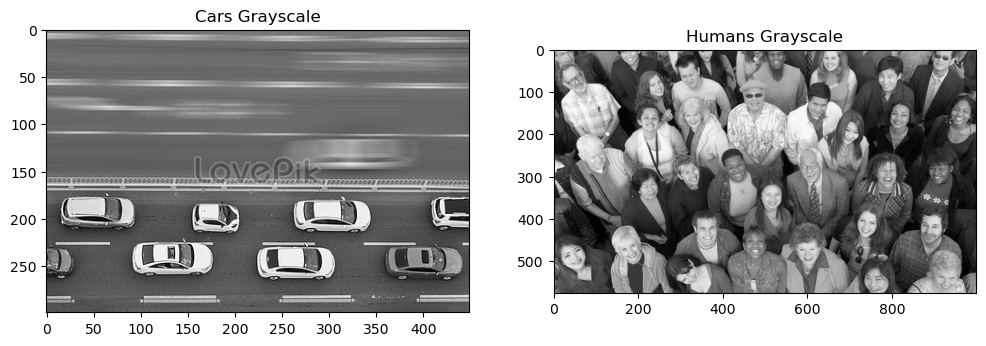

In [18]:
# Gray Scale Conversion
gray_image1 = cv2.cvtColor(cars_image, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(humans_image, cv2.COLOR_RGB2GRAY)

#Showing the Gray Scaled Images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(gray_image1, cmap='gray')
axes[0].set_title("Cars Grayscale")

axes[1].imshow(gray_image2, cmap='gray')
axes[1].set_title("Humans Grayscale")

# Converting to HSV

Text(0.5, 1.0, 'Humans HSV')

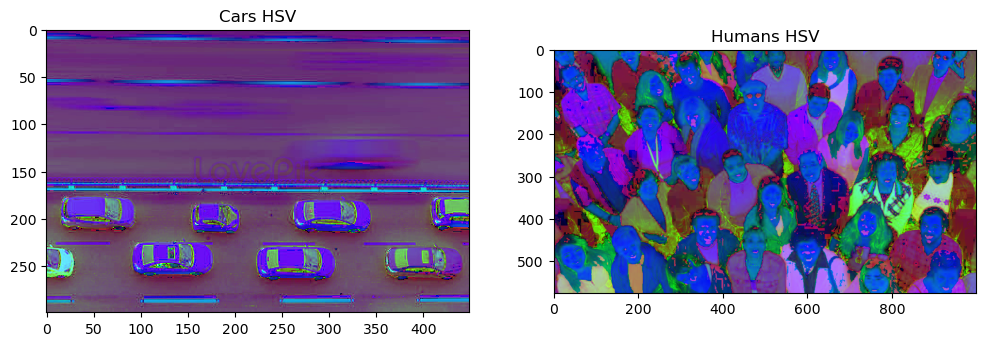

In [23]:
# As per the requirement, we have to convert the Gray_scale image to HSV_image
# It is not possible as Grayscale has only one channel and it requires three channels to get convert the image to HSV
# So, we converted from RGB to HSV
hsv_image1 = cv2.cvtColor(cars_image, cv2.COLOR_RGB2HSV)
hsv_image2 = cv2.cvtColor(humans_image, cv2.COLOR_RGB2HSV)


#Showing the images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(hsv_image1)
axes[0].set_title("Cars HSV")

axes[1].imshow(hsv_image2)
axes[1].set_title("Humans HSV")


# Guassian Blur

Text(0.5, 1.0, 'Humans Gaussian Blur')

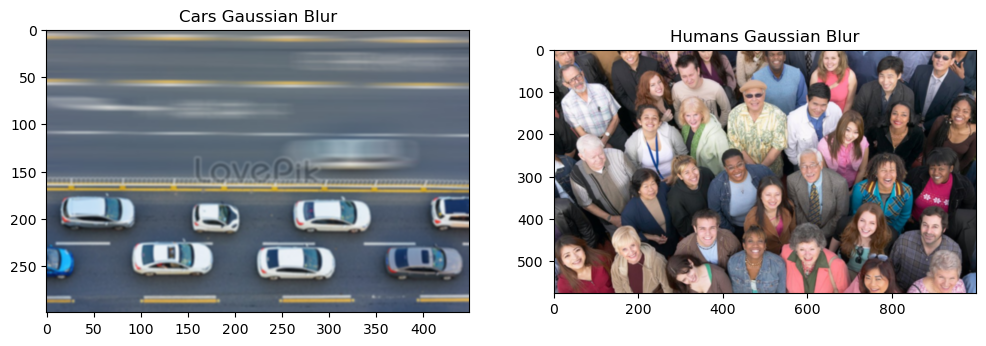

In [24]:
# Applying Gaussian Blur 

blurred_image1 = cv2.GaussianBlur(cars_image, (5, 5), 0)
blurred_image2 = cv2.GaussianBlur(humans_image, (5, 5), 0)

#Showing the Guassian Image
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(blurred_image1)
axes[0].set_title("Cars Gaussian Blur")

axes[1].imshow(blurred_image2)
axes[1].set_title("Humans Gaussian Blur")


# Averaging Filter

Text(0.5, 1.0, 'Humans Average Filter')

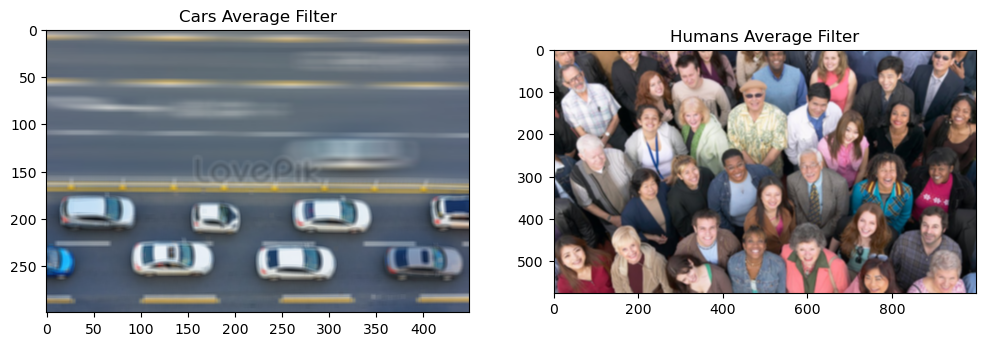

In [26]:
# Applying custom kernel for image smoothing
kernel = np.ones((5, 5), np.float32) / 25  # 5x5 averaging kernel

#Applying the filter
averaging_image1 = cv2.filter2D(cars_image, -1, kernel)
averaging_image2 = cv2.filter2D(humans_image, -1, kernel)

#Showing the images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(averaging_image1)
axes[0].set_title("Cars Average Filter")

axes[1].imshow(averaging_image2)
axes[1].set_title("Humans Average Filter")

# Canny Edge Detection

Text(0.5, 1.0, 'Humans Edges')

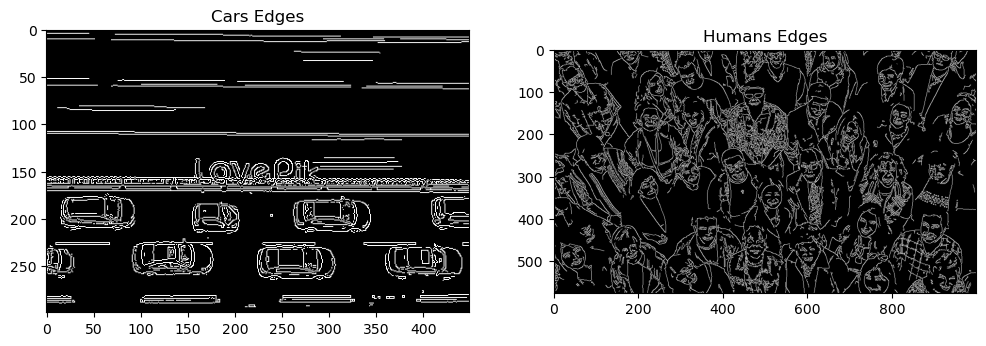

In [27]:
# Apply Canny edge detection to grayscale images and display
canny_edge1 = cv2.Canny(gray_image1, 100, 200)
canny_edge2 = cv2.Canny(gray_image2, 100, 200)

#Showing the edges
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(canny_edge1, cmap='gray')
axes[0].set_title("Cars Edges")

axes[1].imshow(canny_edge2, cmap='gray')
axes[1].set_title("Humans Edges")

# Contour Image

Text(0.5, 1.0, 'Humans Countours')

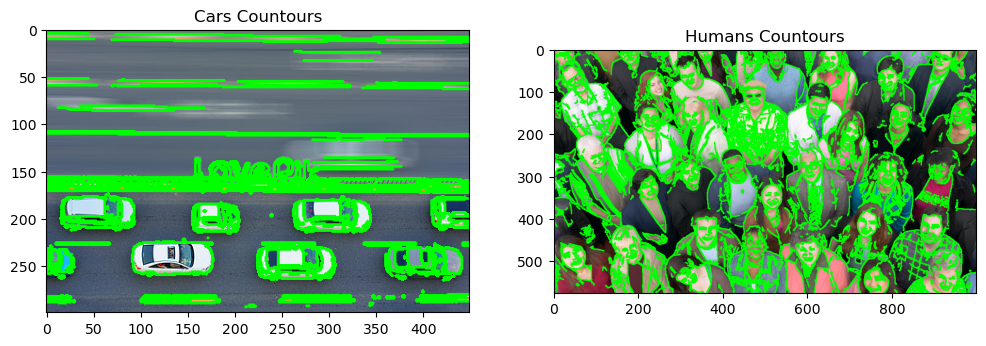

In [33]:
# Contours 
contour_image1 = cars_image.copy()
contour_image2 = humans_image.copy()

#Finding the Contours
contours1, h1 = cv2.findContours(canny_edge1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, h2 = cv2.findContours(canny_edge2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Applying the Contours
cv2.drawContours(contour_image1, contours1, -1, (0, 255, 0), 2)
cv2.drawContours(contour_image2, contours2, -1, (0, 255, 0), 2)

#Showing the edges
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(contour_image1)
axes[0].set_title("Cars Countours")

axes[1].imshow(contour_image2)
axes[1].set_title("Humans Countours")

# Histogram Representation

Text(0.5, 1.0, 'Humans Histogram')

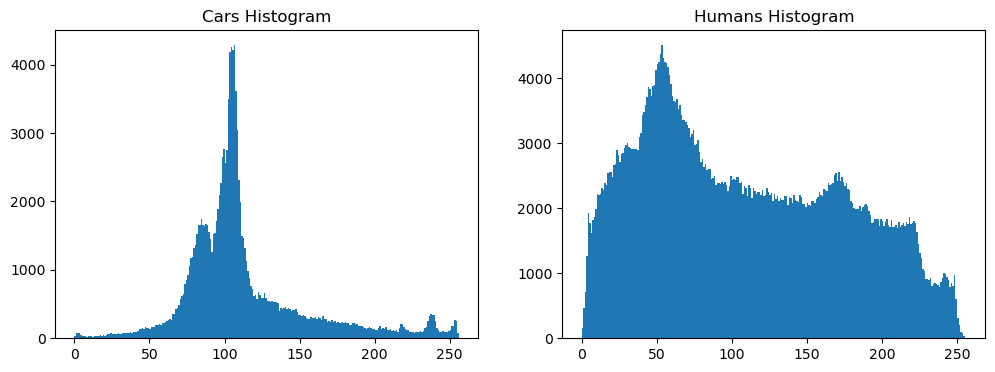

In [30]:
# Compute and display histogram of grayscale images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(gray_image1.ravel(), 256, [0, 256])
axes[0].set_title("Cars Histogram")
axes[1].hist(gray_image2.ravel(), 256, [0, 256])
axes[1].set_title("Humans Histogram")

# Object Detection

In [34]:
#OBJECT DETECTION USING YOLO
#!pip install argparse

Text(0.5, 1.0, 'Detected Humans')

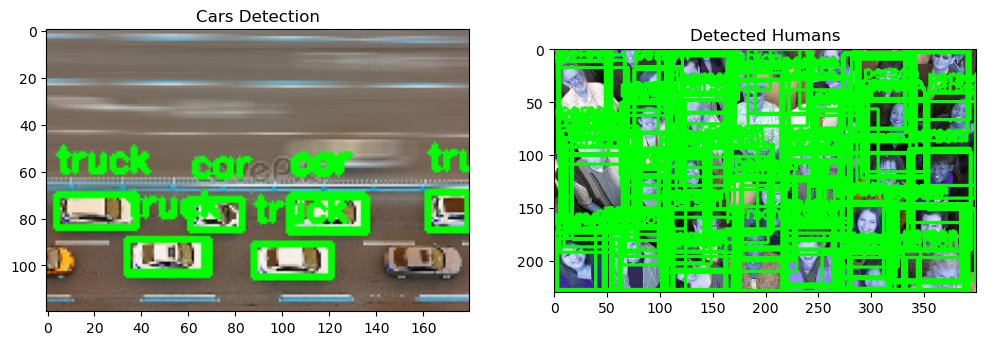

In [43]:
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Set the classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to perform object detection on an image
def detect_objects(image):
    # Resize image
    image = cv2.resize(image, None, fx=0.4, fy=0.4)
    height, width, channels = image.shape

    # Get layer names
    layer_names = net.getLayerNames()
    output_layers = net.getUnconnectedOutLayersNames()

    # Detect objects
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.4:  # Confidence threshold 
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle size
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Draw rectangle and label
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(image, classes[class_id], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return image

# Cars and Humans Images Path defined in first cell
detected_cars = detect_objects(cars_path)

# Perform object detection on image2
detected_humans = detect_objects(humans_path)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(detected_cars)
axes[0].set_title("Cars Detection")

axes[1].imshow(detected_humans)
axes[1].set_title("Detected Humans")
